In [1]:
import MySQLdb
conn = MySQLdb.connect(host='127.0.0.1', port=3306, user='root', passwd='123', db='edm', charset='utf8')
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import pandas.io.sql as sql
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [65]:
data = pd.read_csv("C:\\Users\\X1\\Desktop\\new_clustered_data.csv")

In [66]:
data.head()

,Unnamed: 0,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority
0,0,169,X,72,238,33,27.883333,15,1,1,3
1,1,170,X,115,238,39,20.283333,15,1,1,2
2,2,171,Y,77,238,57,22.683333,15,1,1,2
3,3,172,X,137,216,31,8.266667,13,1,0,3
4,4,184,X,49,72,8,3.666667,15,1,0,3


## supply连续值（quest, time）

In [180]:
data1 = pd.DataFrame(preprocessing.scale(data.loc[:,['question_number', 'time']]))

data['supply_2'] = (data1[0]-0.5*data1[1])/1.5
data['supply_2'].describe()

count    2.250000e+02
mean     3.157968e-17
std      7.500234e-01
min     -2.310387e+00
25%     -3.607200e-01
50%     -2.428166e-01
75%      2.726683e-01
max      3.703359e+00
Name: supply_2, dtype: float64

## 验证聚类结果和连续值的关系

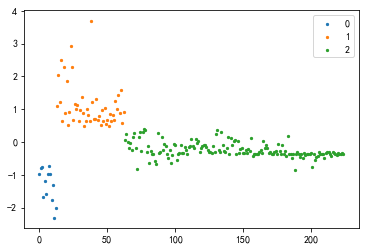

In [181]:
mylist=[data[data['supply']==0], data[data['supply']==1],data[data['supply']==2]]
l=0
for dataset in mylist:
    l_new = l+dataset.shape[0]
    plt.scatter(np.arange(l,l_new,1),dataset['supply_2'],s=5)
    l = l_new
plt.legend([0,1,2])

## 效果似乎比较匹配

## 对其他两个新参数同样进行连续化处理

In [106]:
data1 = pd.DataFrame(preprocessing.scale(data.loc[:,['error_frequency', 'time']]))

data['study_feature_2'] = (-data1[0]+2*data1[1])/3
data['study_feature_2'].describe()

count    2.250000e+02
mean     1.381611e-17
std      7.012105e-01
min     -1.449615e+00
25%     -3.006506e-01
50%     -8.648040e-02
75%      5.439865e-02
max      3.831193e+00
Name: study_feature_2, dtype: float64

In [113]:
data.head()

,Unnamed: 0,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority,priority_2,study_feature_2,supply_2,12
0,0,169,X,72,238,33,27.883333,15,1,1,3,0.185091,-0.575890,0.524815,0.575890
1,1,170,X,115,238,39,20.283333,15,1,1,2,0.077549,-0.702409,1.194764,0.702409
2,2,171,Y,77,238,57,22.683333,15,1,1,2,-0.257662,-1.031627,0.596250,1.031627
3,3,172,X,137,216,31,8.266667,13,1,0,3,-0.050589,-0.577963,1.525351,-0.577963
4,4,184,X,49,72,8,3.666667,15,1,0,3,0.661090,-0.160359,0.124100,-0.160359


In [110]:
data.iloc[:10,12]

0   -0.575890
1   -0.702409
2   -1.031627
3   -0.577963
4   -0.160359
5   -0.109917
6   -0.095286
7   -0.379099
8   -0.213642
9   -0.352337
Name: study_feature_2, dtype: float64

In [118]:
for ei in data.index:
    if data.iloc[ei,9]==1:
        data.iloc[ei,12] = -data.iloc[ei,12]

In [119]:
data.head()

,Unnamed: 0,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority,priority_2,study_feature_2,supply_2,12
0,0,169,X,72,238,33,27.883333,15,1,1,3,0.185091,0.575890,0.524815,0.575890
1,1,170,X,115,238,39,20.283333,15,1,1,2,0.077549,0.702409,1.194764,0.702409
2,2,171,Y,77,238,57,22.683333,15,1,1,2,-0.257662,1.031627,0.596250,1.031627
3,3,172,X,137,216,31,8.266667,13,1,0,3,-0.050589,-0.577963,1.525351,-0.577963
4,4,184,X,49,72,8,3.666667,15,1,0,3,0.661090,-0.160359,0.124100,-0.160359


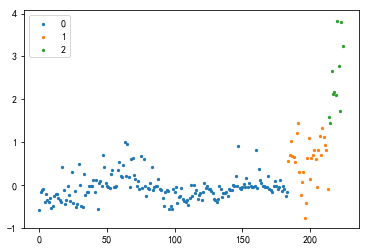

In [120]:

mylist=[data[data['study_feature']==0], data[data['study_feature']==1],data[data['study_feature']==2]]
l=0
for dataset in mylist:
    l_new = l+dataset.shape[0]
    plt.scatter(np.arange(l,l_new,1),dataset['study_feature_2'],s=5)
    l = l_new
plt.legend([0,1,2])

In [121]:
data1 = pd.DataFrame(preprocessing.scale(data.loc[:,['error_frequency', 'time','score']]))

data['priority_2'] = (-2*data1[0]-data1[1]+3*data1[2])/6+1.5
data1.head()

,0,1,2
0,0.903565,-0.412052,0.835207
1,1.237577,-0.434825,0.835207
2,2.239613,-0.427633,0.835207
3,0.792227,-0.470831,0.270029
4,-0.488153,-0.484614,0.835207


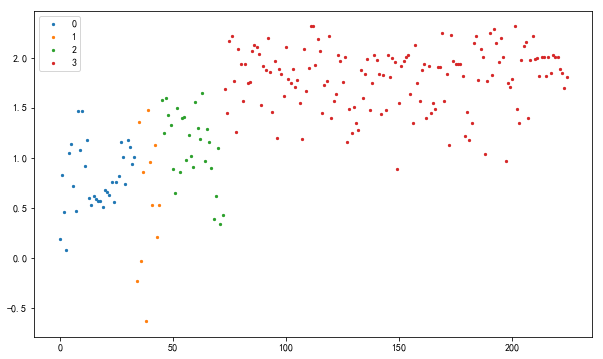

In [122]:
mylist=[data[data['priority']==0], data[data['priority']==1],data[data['priority']==2],data[data['priority']==3]]
l=0
plt.figure(figsize=(10,6))
for dataset in mylist:
    l_new = l+dataset.shape[0]
    plt.scatter(np.arange(l,l_new,1),dataset['priority_2'],s=5)
    l = l_new
plt.legend([0,1,2,3])

## 用连续值进行聚类

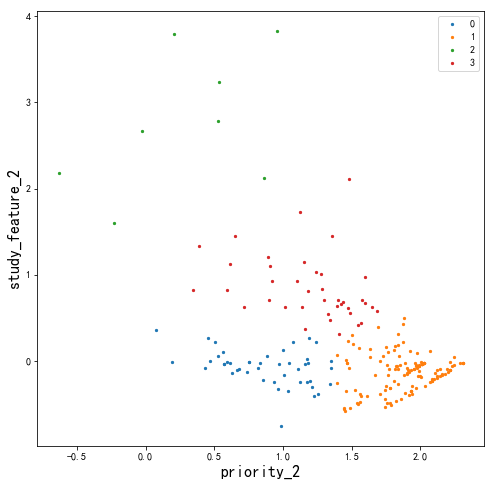

In [169]:
data4 = data.loc[:,['skill_point','study_feature_2','priority_2']]#

myModel = KMeans(n_clusters=4)
data_to_cluster=preprocessing.scale(data4.loc[:,['study_feature_2','priority_2']])
myModel.fit(data_to_cluster)
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]
data4_3 = data4[data4['label']==3]
list4 = [data4_0,data4_1, data4_2, data4_3]



#legend_list=['0','1', '2']
#plt.legend(legend_list, fontsize=16)

fig = plt.figure(figsize=(8,8))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
ax = fig.add_subplot(1,1,1)
for result in list4:
    ax.scatter(result['priority_2'],result['study_feature_2'],s=5)

ax.set_ylabel('study_feature_2',fontsize=16)
ax.set_xlabel('priority_2',fontsize=16)
ax.legend([0,1,2,3])



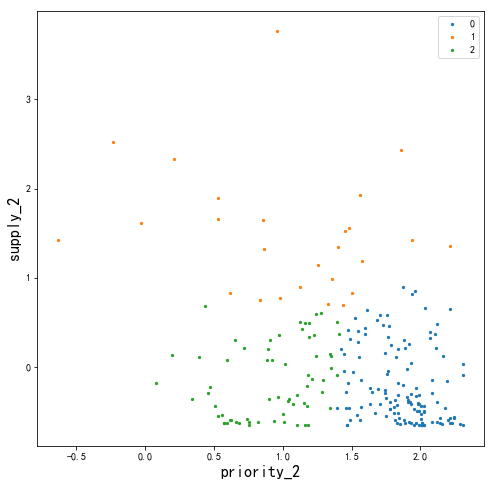

In [171]:
data4 = data.loc[:,['skill_point','supply_2','priority_2']]#

myModel = KMeans(n_clusters=3)
data_to_cluster=preprocessing.scale(data4.loc[:,['supply_2','priority_2']])
myModel.fit(data_to_cluster)
label_pred = myModel.labels_
centroids = myModel.cluster_centers_

data4['label'] = label_pred#

data4_1 = data4[data4['label']==1]
data4_2 = data4[data4['label']==2]
data4_0 = data4[data4['label']==0]
#data4_3 = data4[data4['label']==3]
list4 = [data4_0,data4_1, data4_2]



#legend_list=['0','1', '2']
#plt.legend(legend_list, fontsize=16)

fig = plt.figure(figsize=(8,8))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
ax = fig.add_subplot(1,1,1)
for result in list4:
    ax.scatter(result['priority_2'],result['supply_2'],s=5)

ax.set_ylabel('supply_2',fontsize=16)
ax.set_xlabel('priority_2',fontsize=16)
ax.legend([0,1,2])



## 不想做了，直接比较priority和importance吧

In [131]:
data.head()

,Unnamed: 0,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority,priority_2,study_feature_2,supply_2,12
0,0,169,X,72,238,33,27.883333,15,1,1,3,1.685091,0.575890,0.524815,0.575890
1,1,170,X,115,238,39,20.283333,15,1,1,2,1.577549,0.702409,1.194764,0.702409
2,2,171,Y,77,238,57,22.683333,15,1,1,2,1.242338,1.031627,0.596250,1.031627
3,3,172,X,137,216,31,8.266667,13,1,0,3,1.449411,-0.577963,1.525351,-0.577963
4,4,184,X,49,72,8,3.666667,15,1,0,3,2.161090,-0.160359,0.124100,-0.160359


In [134]:
z={'X':2, 'Y':1, 'Z':0}
data['importance']=data['importance'].map(z)

In [135]:
data.head()

,Unnamed: 0,skill_point,importance,question_number,appearance_frequency,error_frequency,time,score,supply,study_feature,priority,priority_2,study_feature_2,supply_2,12
0,0,169,2,72,238,33,27.883333,15,1,1,3,1.685091,0.575890,0.524815,0.575890
1,1,170,2,115,238,39,20.283333,15,1,1,2,1.577549,0.702409,1.194764,0.702409
2,2,171,1,77,238,57,22.683333,15,1,1,2,1.242338,1.031627,0.596250,1.031627
3,3,172,2,137,216,31,8.266667,13,1,0,3,1.449411,-0.577963,1.525351,-0.577963
4,4,184,2,49,72,8,3.666667,15,1,0,3,2.161090,-0.160359,0.124100,-0.160359


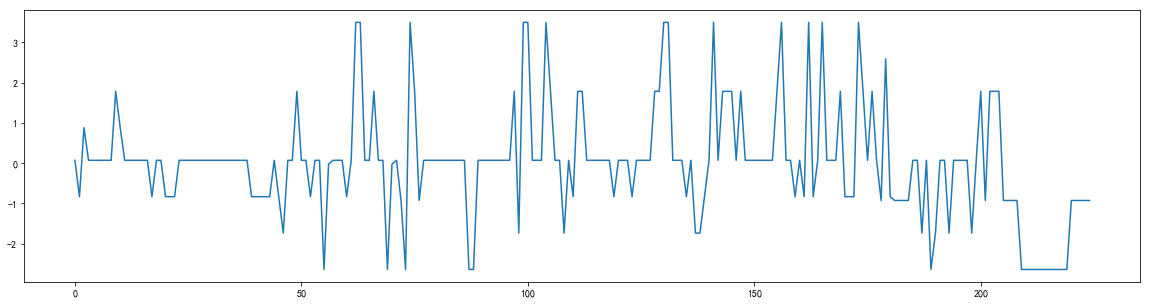

In [152]:

data_to_compare=pd.DataFrame(preprocessing.scale(data.loc[:,['priority', 'importance']]),columns=['priority', 'importance'])
#plt.scatter(data_to_compare.iloc[:,0], data_to_compare.iloc[:,1], s=5)
#plt.scatter(data.index,data_to_compare.iloc[:,0], s=5)
#plt.scatter(data.index,data_to_compare.iloc[:,1], s=5)
data_to_compare.head()
data_to_compare['difference']=data_to_compare['priority']-data_to_compare['importance']
plt.figure(figsize=(20,5))
plt.plot(data_to_compare.index,data_to_compare['difference'])

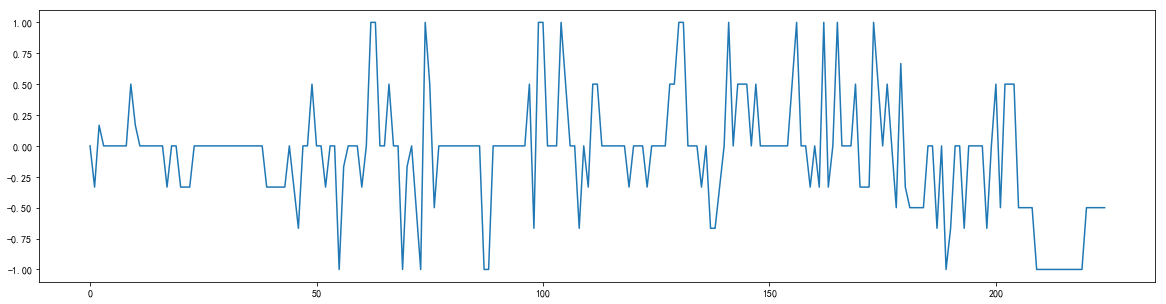

In [166]:
min_max_scaler = preprocessing.MinMaxScaler()
data_to_compare2 = pd.DataFrame(min_max_scaler.fit_transform(data.loc[:,['priority', 'importance']]),columns=['priority', 'importance'])
data_to_compare2['difference']=data_to_compare2['priority']-data_to_compare2['importance']
plt.figure(figsize=(20,5))
plt.plot(data_to_compare2.index,data_to_compare2['difference'])

In [168]:
data_to_compare2[data_to_compare2['difference']==0].count()

priority      117
importance    117
difference    117
dtype: int64